# **Q2**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Text(0.5, 1.0, 'Original Image')

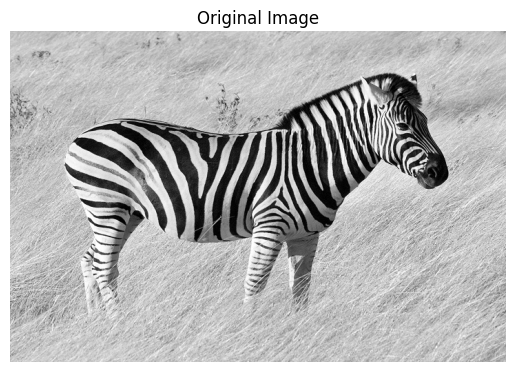

In [2]:
# first read the image and show it.(image2)
image1 = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(image1, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

In [3]:
# run this cell for plotting
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Implement this function for changing phases and amplitudes of images.

In [4]:
def draw_phase_amplitude(image):
    '''
    Returns the phase image and the amplitude image from the input image.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        tuple of numpy.ndarray: The tuple of the phase image and the amplitude image.
    '''

    # Compute Fourier transform
    fourier_image = np.fft.fft2(image)

    # Shift the zero-frequency component to the center of the spectrum
    fourier_image_shifted = np.fft.fftshift(fourier_image)

    # Calculate the phase and amplitude of the image
    phase = np.angle(fourier_image_shifted)
    amplitude = np.abs(fourier_image_shifted)

    return phase, amplitude

def change_phase_domain(image1, image2):
    '''
    Substitutes the phase of image1 by the phase of image2 and returns two new images.

    Parameters:
        image1 (numpy.ndarray): The input image1.
        image2 (numpy.ndarray): The input image2.

    Returns:
        tuple of numpy.ndarray: The tuple of result images.
    '''

    # Compute Fourier transforms
    f_transform1 = np.fft.fft2(image1)
    f_transform2 = np.fft.fft2(image2)

    # Compute magnitudes and phases
    mag1 = np.abs(f_transform1)
    mag2 = np.abs(f_transform2)
    phase1 = np.angle(f_transform1)
    phase2 = np.angle(f_transform2)

    # Substitute phase of image1 with phase of image2
    result1 = mag1 * np.exp(1j * phase2)
    result2 = mag2 * np.exp(1j * phase1)

    # Compute inverse Fourier transforms to get the new images
    img1 = np.fft.ifft2(result1).real
    img2 = np.fft.ifft2(result2).real

    return img1, img2


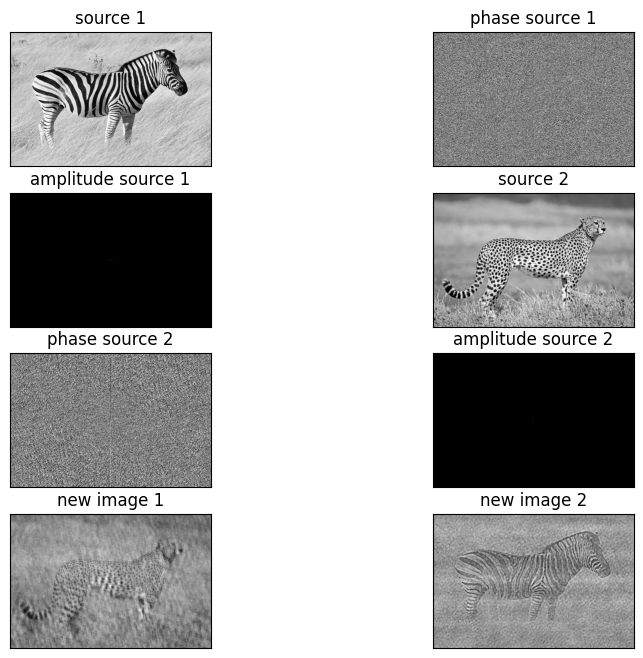

In [5]:
# dont change this cell
image_list = []
# image1 = cv2.imread(os.path.join('images', '1.jpg'), cv2.IMREAD_GRAYSCALE)
# image2 = cv2.imread(os.path.join('images', '2.jpg'), cv2.IMREAD_GRAYSCALE)
image1 = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE)

image_list.append([image1, 'source 1', 'img'])

phase1, amp1 = draw_phase_amplitude(image1)
image_list.append([phase1, 'phase source 1', 'img'])
image_list.append([amp1, 'amplitude source 1', 'img'])

image_list.append([image2, 'source 2', 'img'])

phase2, amp2 = draw_phase_amplitude(image2)
image_list.append([phase2, 'phase source 2', 'img'])
image_list.append([amp2, 'amplitude source 2', 'img'])

res1, res2 = change_phase_domain(image1, image2)
image_list.append([res1, 'new image 1', 'img'])   
image_list.append([res2, 'new image 2', 'img'])

plotter(image_list, 4, 2, True, 10, 8, 'Q3')